# Main analysis

In [2]:
# imports
import main
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

Cholesky dict
2: 2
3: 6
4: 28
5: 192

sqrt list
2: 2
3: 6
4: 28
5: 192


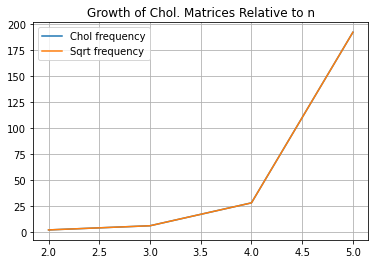

In [3]:

reload(main)

run_from = 2
up_to = 6

n_list = []         # parallel list of n 
chol_len_list = []
sqrt_len_list = []

for dim in range(run_from, up_to):
    general_upper_matrix = main.generate_upper_triangular_matrix_of_nxn(dim)
    upper_triangular_list = main.find_matrix_list_from_gen(2, general_upper_matrix)
    sqrt_list = main.generate_square_root_matrices(2, upper_triangular_list)
    chol_list = main.generate_cholesky_roots_matrices(2, upper_triangular_list)

    n_list.append(dim)
    sqrt_len_list.append(len(sqrt_list))
    chol_len_list.append(len(chol_list))

print("Cholesky dict")
for i in range(len(sqrt_len_list)):
    print(str(n_list[i]) + ": " + str(chol_len_list[i]))
print()
print("sqrt list")
for i in range(len(sqrt_len_list)):
    print(str(n_list[i]) + ": " + str(sqrt_len_list[i]))

fig = plt.figure()
fig.patch.set_facecolor("white")
plt.title("Growth of Chol. Matrices Relative to n")

plt.plot(n_list, chol_len_list, label="Chol frequency")
plt.plot(n_list, sqrt_len_list, label="Sqrt frequency")

plt.legend()

plt.grid(True)

plt.show()